## import libraries and extract file in local system

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_excel("patient_appointments.xlsx")

In [6]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduleDay,AppointmentDay,Appointment_Weekday,Age_Group
0,29872500000000,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,42489,42489,Friday,Senior
1,558998000000000,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,42489,42489,Friday,Adult
2,4262960000000,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,42489,42489,Friday,Senior
3,867951000000,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,42489,42489,Friday,Child
4,8841190000000,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,42489,42489,Friday,Adult


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduleDay,AppointmentDay
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.00000,110527.00000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,42498.85646,42498.85646
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,19.14013,19.14013
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42318.00000,42318.00000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42489.00000,42489.00000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42500.00000,42500.00000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,42510.00000,42510.00000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,42529.00000,42529.00000


In [9]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0


In [10]:
df.dtypes

,0
PatientId,int64
AppointmentID,int64
Gender,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64
Alcoholism,int64
Handcap,int64


In [15]:
df.count()

,0
PatientId,110527
AppointmentID,110527
Gender,110527
Age,110527
Neighbourhood,110527
Scholarship,110527
Hipertension,110527
Diabetes,110527
Alcoholism,110527
Handcap,110527


### Health Condition Impact Analysis

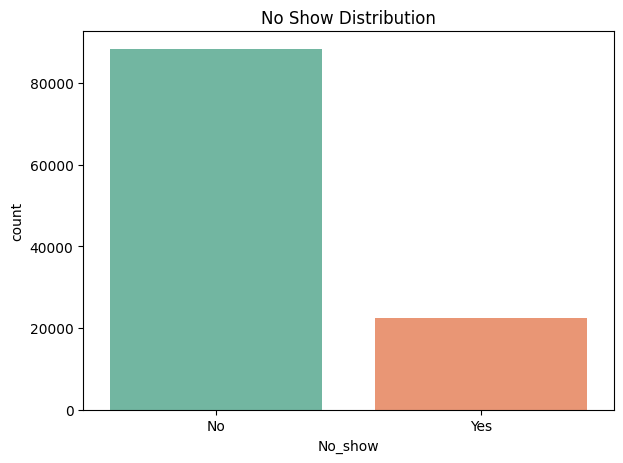

In [16]:
# Target Column Distribution
sns.countplot(data=df,x='No_show',palette='Set2')
sns.set(rc={'figure.figsize':(10,5)})
plt.title("No Show Distribution")
plt.tight_layout()
plt.show()

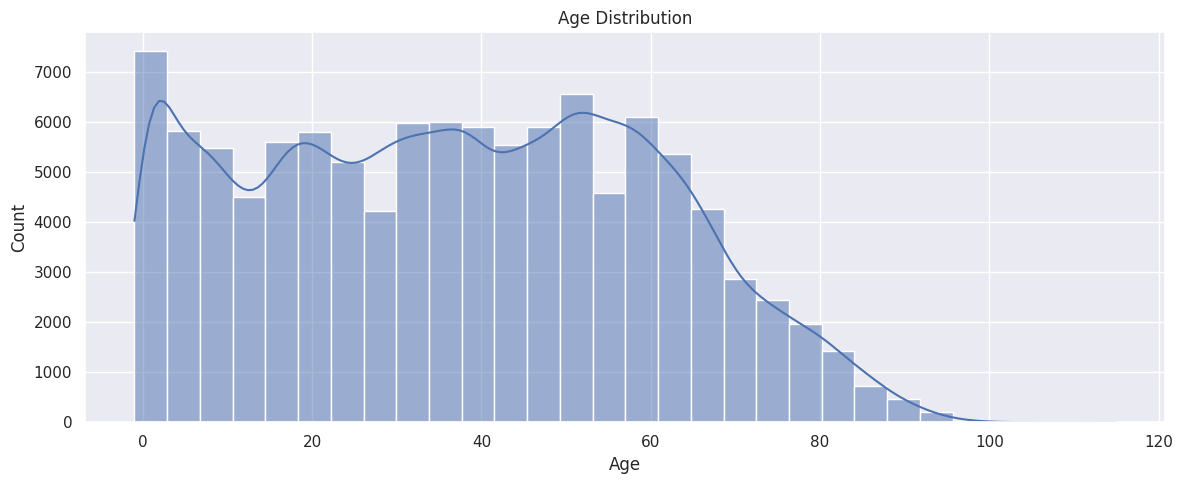

In [17]:
# Age Distribution
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df['Age'],kde=True,bins=30)
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

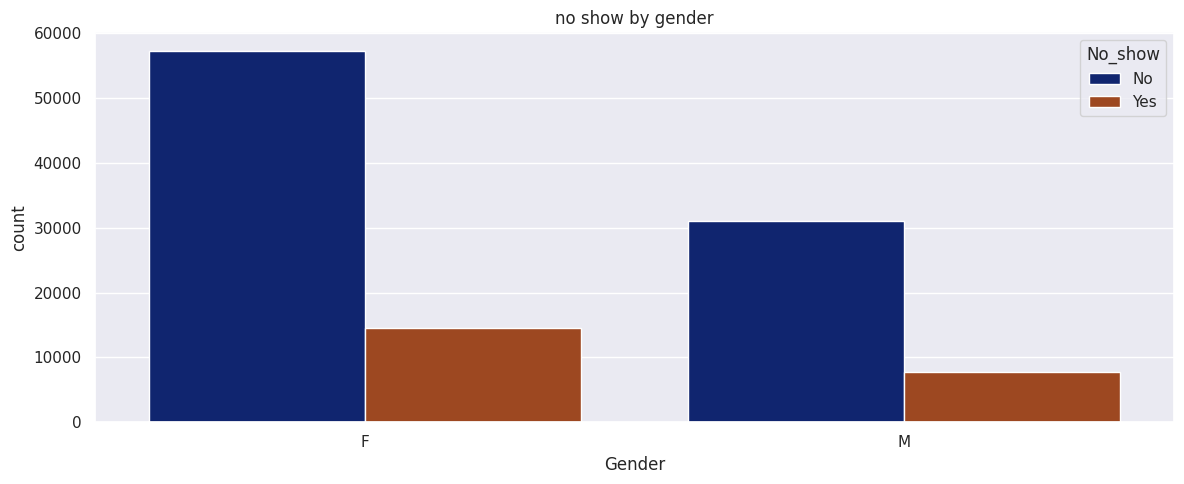

In [18]:
# Gender vs No_show
sns.countplot(data=df,x='Gender',hue='No_show',palette='dark')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("no show by gender")
plt.tight_layout()
plt.show()

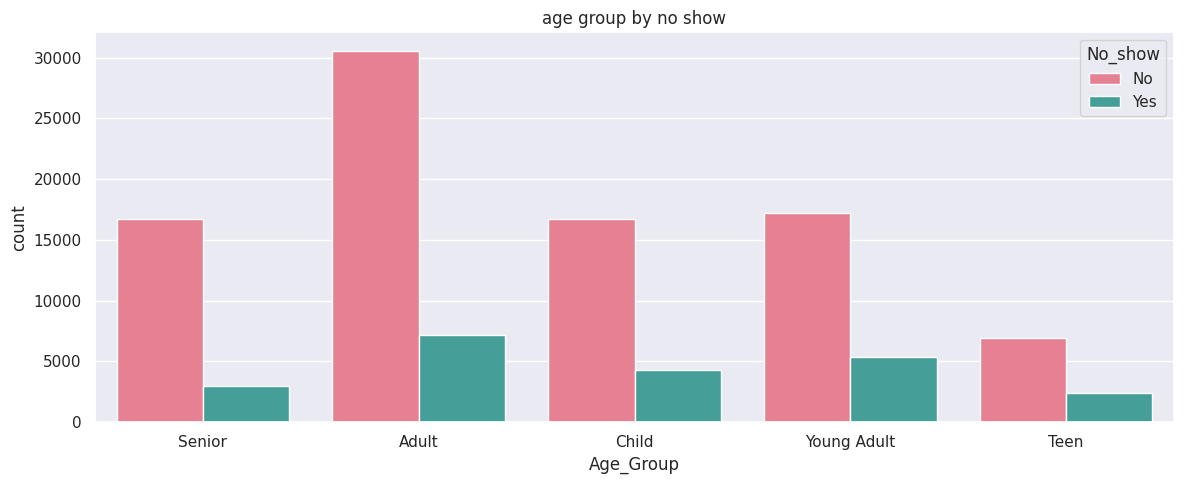

In [19]:
# Age_Group vs No_show
sns.countplot(data=df,x='Age_Group',hue='No_show',palette='husl')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("age group by no show")
plt.tight_layout()
plt.show()

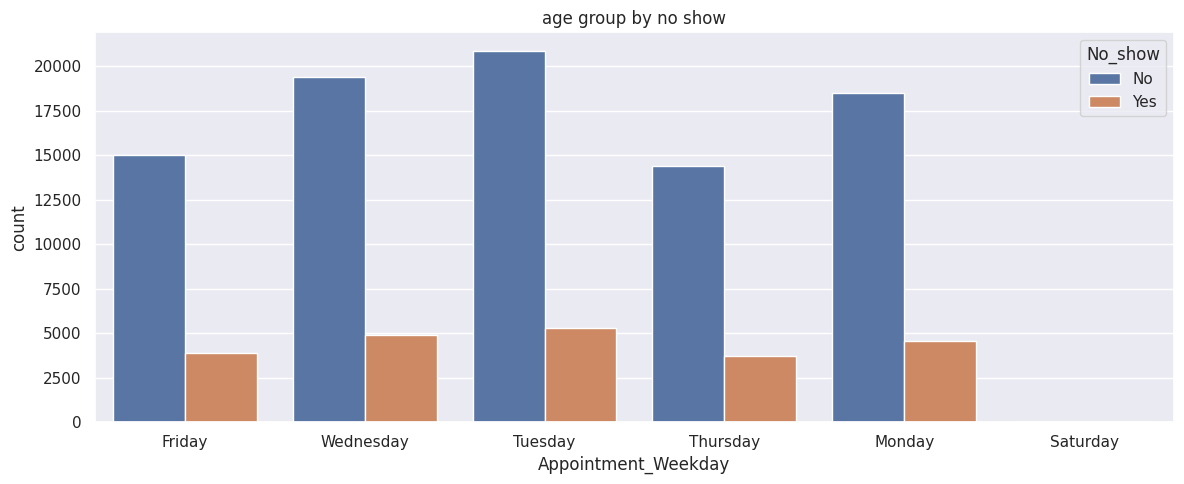

In [23]:
# appointment_weekdays vs No_show
sns.countplot(data=df,x='Appointment_Weekday',hue='No_show',palette='deep')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("age group by no show")
plt.tight_layout()
plt.show()

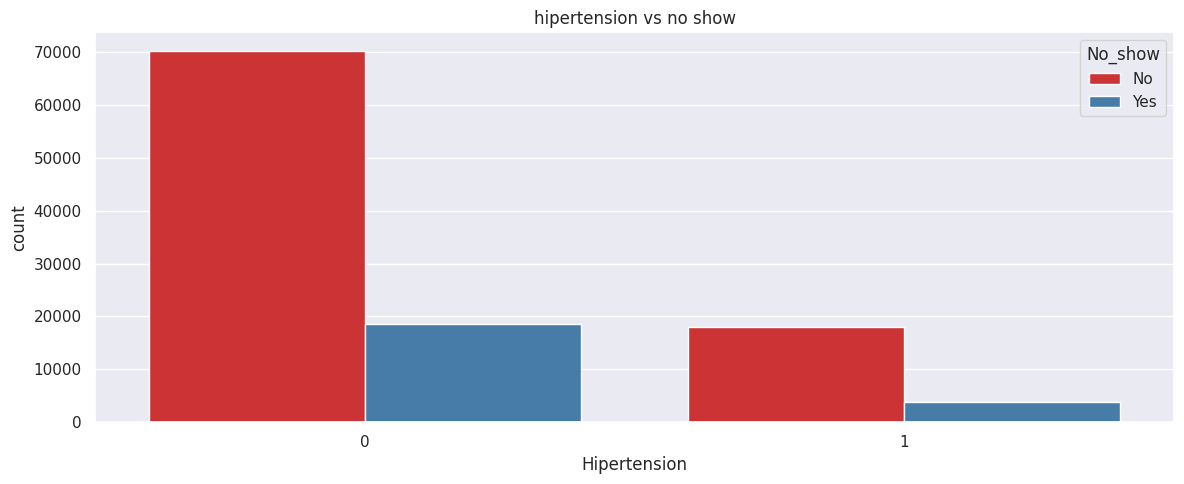

In [24]:
# Hypertension vs No_show
sns.countplot(data=df,x='Hipertension',hue='No_show',palette='Set1')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("hipertension vs no show")
plt.tight_layout()
plt.show()

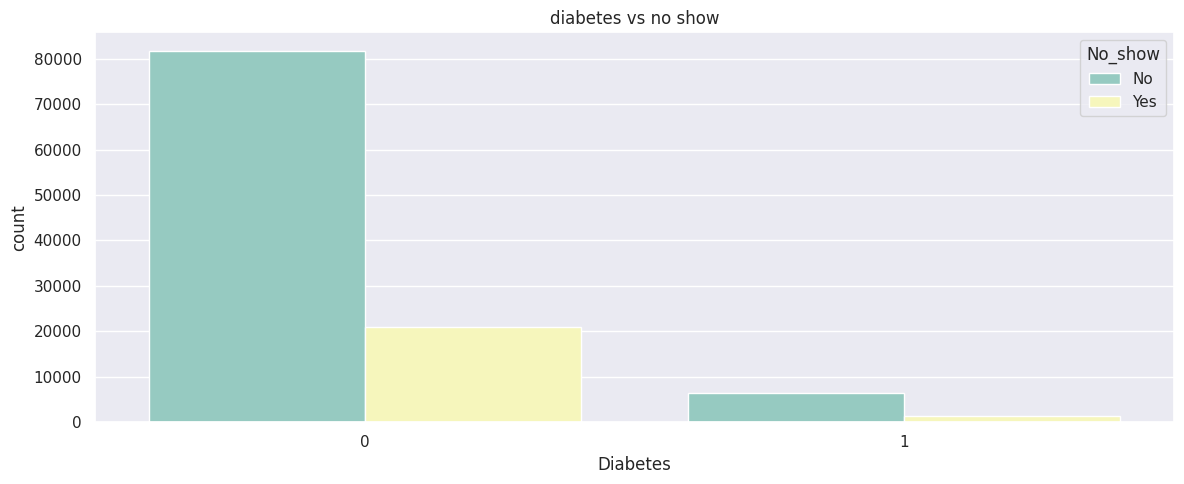

In [25]:
# Diabetes vs No_show
sns.countplot(data=df, x='Diabetes', hue='No_show', palette='Set3')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("diabetes vs no show")
plt.tight_layout()
plt.show()

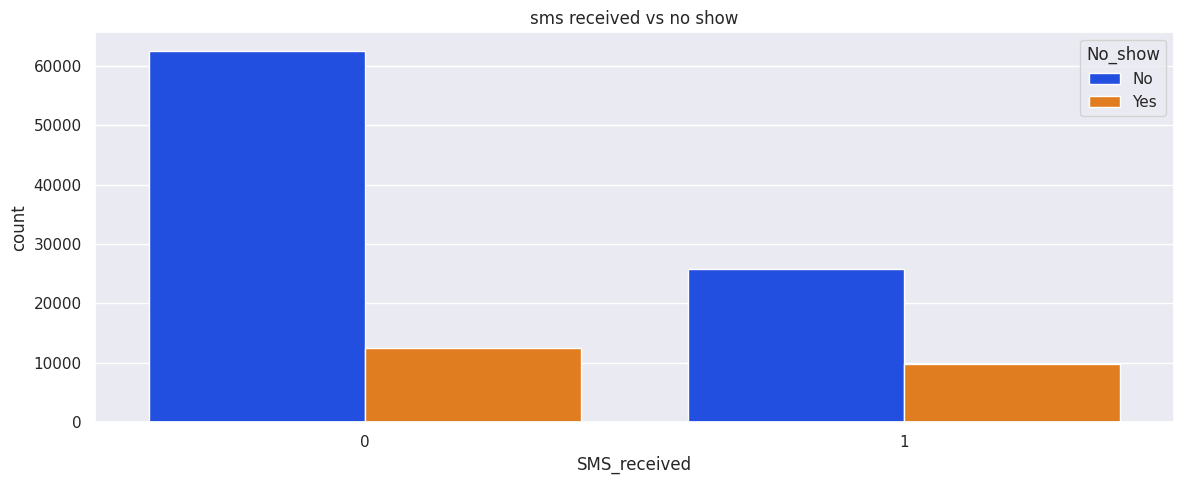

In [27]:
# SMS_received vs No_show
sns.countplot(data=df, x='SMS_received', hue='No_show', palette='bright')
sns.set(rc={'figure.figsize':(12,5)})
plt.title("sms received vs no show")
plt.tight_layout()
plt.show()

### Multivariate Analysis & Final Feature Engineering

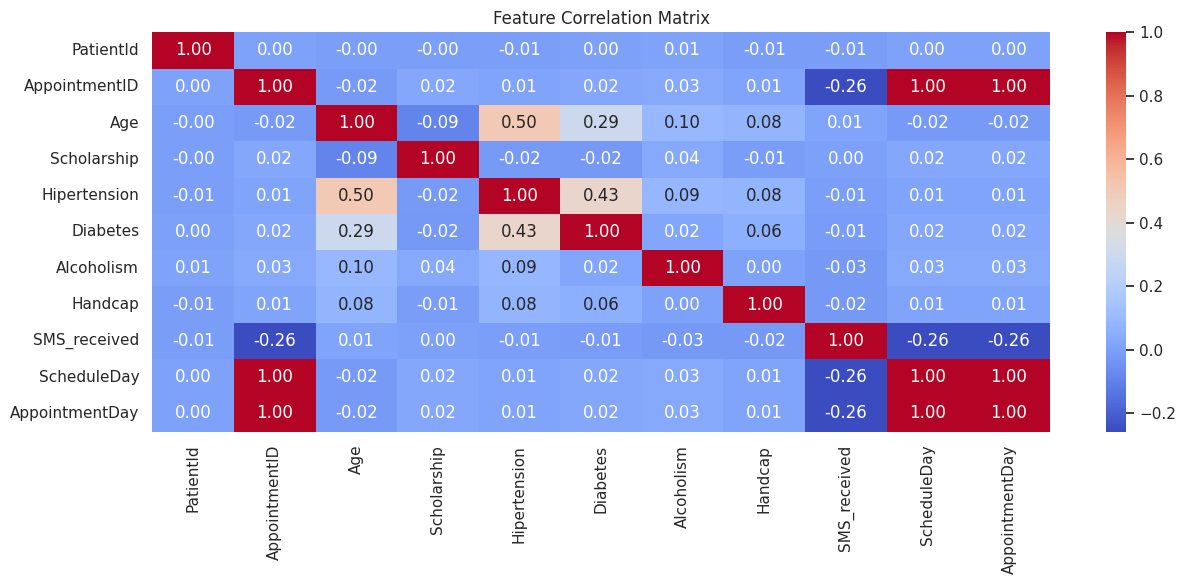

In [33]:
# Selecting only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.set(rc={'figure.figsize':(13,6)})
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [34]:
# Categorical Variables
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})

In [35]:
df = pd.get_dummies(df, columns=['Appointment_Weekday', 'Age_Group'], drop_first=True)


In [37]:
# dlt column bcs we dont need for ml
df.drop(columns=['PatientId', 'AppointmentID','AppointmentDay','Neighbourhood'], inplace=True)

# machine learning for prediction


In [38]:
# Split data into X (features) and y (target)
X = df.drop('No_show', axis=1)
y = df['No_show']


In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [40]:
# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Logistic Regression Predictions
y_pred_log = log_model.predict(X_test)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# ---- Logistic Regression Evaluation ----
print(" Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ---- Random Forest Evaluation ----
print(" Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

 Logistic Regression Results
Accuracy: 0.7980638740613408
Confusion Matrix:
 [[17642     0]
 [ 4464     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

 Random Forest Results
Accuracy: 0.7644530896589161
Confusion Matrix:
 [[16097  1545]
 [ 3662   802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86     17642
           1       0.34      0.18      0.24      4464

    accuracy                           0.76     22106
   macro avg       0.58      0.55      0.55     22106
weighted avg       0.72      0.76      0.73     22106



# Note: ✅ Key Findings:
Logistic Regression achieved ~80% accuracy, but failed to identify no-show cases, predicting everyone would show up.

Random Forest performed slightly better, identifying some no-shows correctly with recall ~18% and precision ~34% for the no-show class.

Both models showed high accuracy mainly because the dataset is imbalanced (majority of patients actually show up).

# Conclusion:

While the models predict patient attendance well, they struggle to accurately forecast no-shows — highlighting the importance of handling imbalanced data in future improvements.